## VIVEK BHAVSHAR
## IBM Attrition Rate
### Machine Learning Algo.

In [1]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

#preprocess
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder,OneHotEncoder

In [3]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [7]:
df=pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df.shape

(1470, 35)

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
df.info() #checking for null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
#msno.matrix(df) # just to visualize. one final time

In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


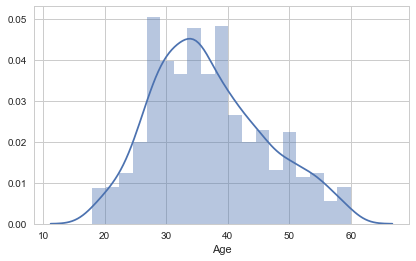

In [15]:
sns.distplot(df['Age'])

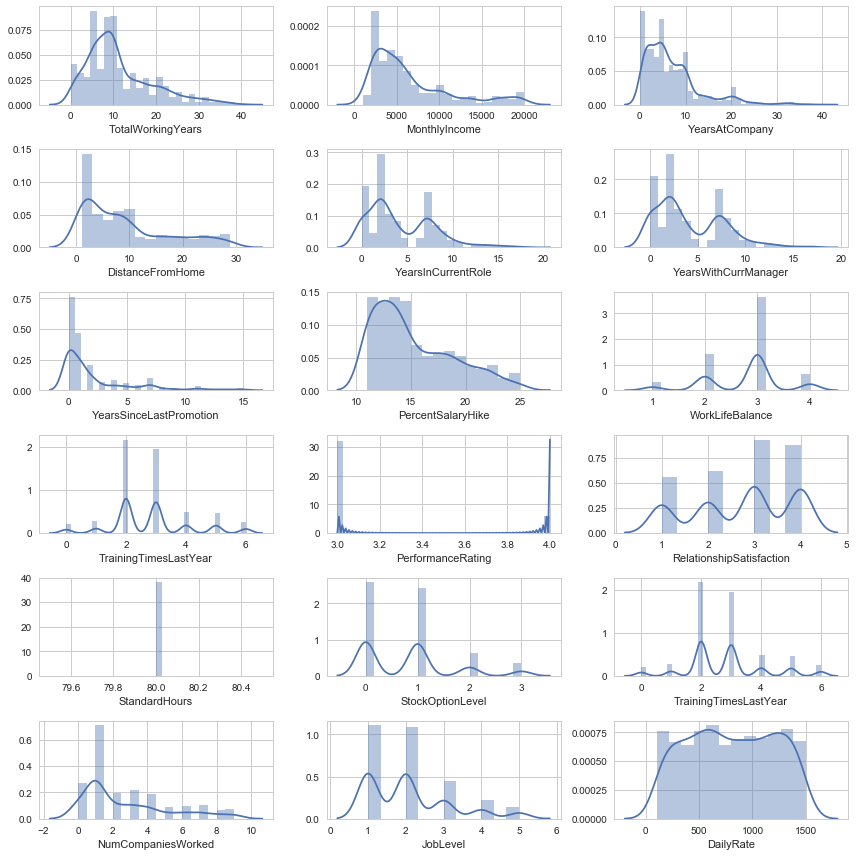

In [16]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(6,3, figsize=(12,12))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[0,2]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,0]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[1,1]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[1,2]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[2,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[2,1]) 
sns.distplot(df['WorkLifeBalance'], ax = ax[2,2]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[3,0])
sns.distplot(df['PerformanceRating'], ax = ax[3,1])
sns.distplot(df['RelationshipSatisfaction'], ax = ax[3,2])
sns.distplot(df['StandardHours'], ax = ax[4,0])
sns.distplot(df['StockOptionLevel'], ax = ax[4,1])
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,2])
sns.distplot(df['NumCompaniesWorked'], ax = ax[5,0])
sns.distplot(df['JobLevel'], ax = ax[5,1])
sns.distplot(df['DailyRate'], ax = ax[5,2])

plt.tight_layout()
plt.show()

In [14]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [15]:
def plot_cat(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    elif(attr=='EducationField'):
        sns.factorplot(data=df,kind='count',size=4,aspect=2,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=3,aspect=1.8,x=attr)

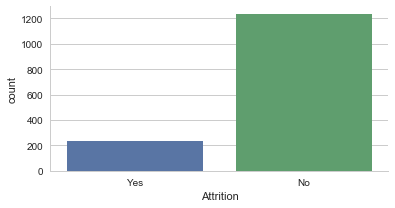

In [16]:
plot_cat('Attrition') 

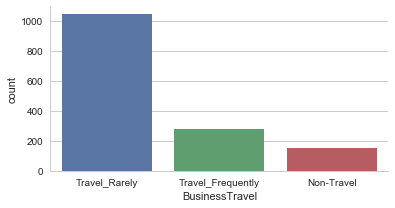

In [17]:
plot_cat('BusinessTravel')   


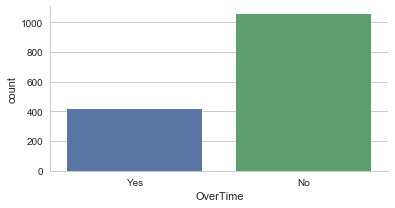

In [18]:
plot_cat('OverTime')

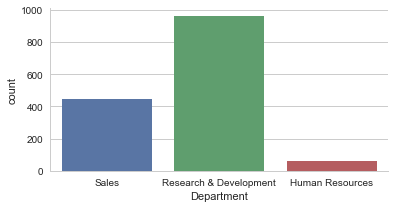

In [19]:
plot_cat('Department')   

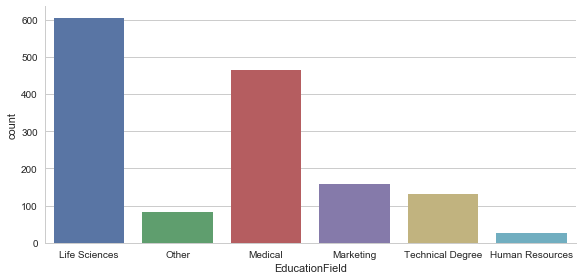

In [20]:
plot_cat('EducationField')

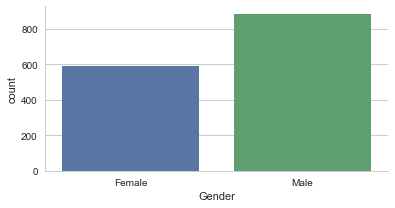

In [21]:
plot_cat('Gender') 

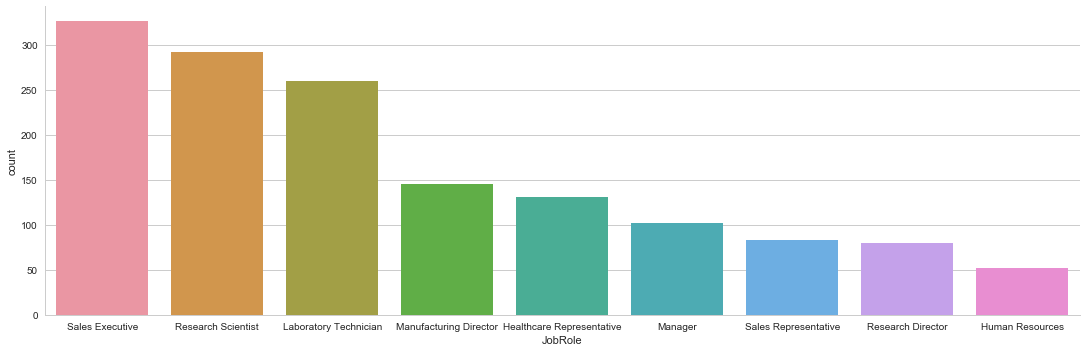

In [22]:
plot_cat('JobRole')   

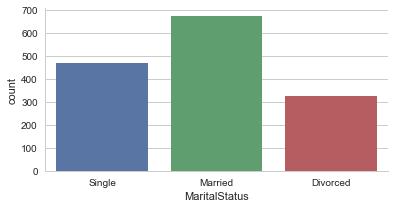

In [23]:
plot_cat('MaritalStatus')   

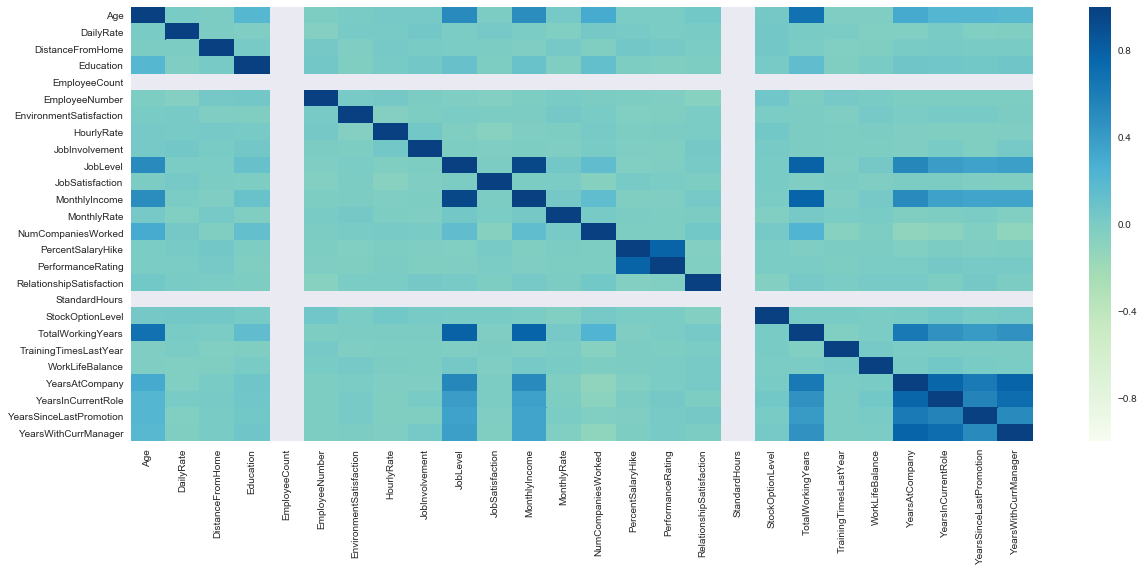

In [24]:
sns.set(rc={'figure.figsize': (18,8)})
sns.heatmap(df.corr(),vmin=-1.0,vmax=1.0,cmap='GnBu')

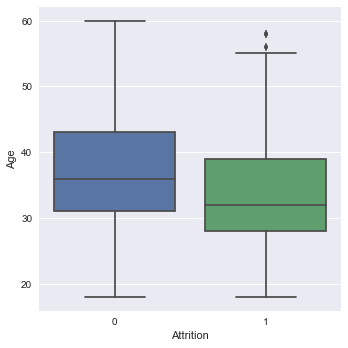

In [44]:
sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')


In [45]:
df.Department.value_counts()

1    961
2    446
0     63
Name: Department, dtype: int64

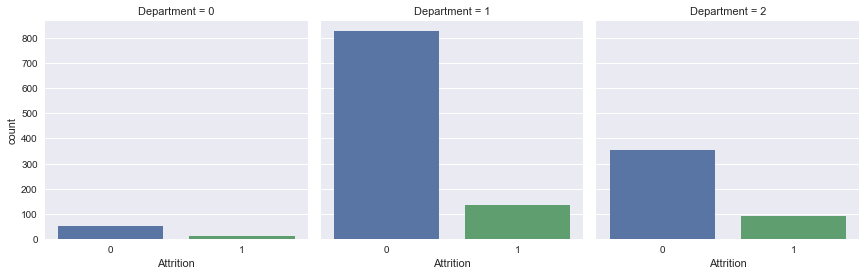

In [46]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')


In [47]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,0,1
Department,,
0,0.809524,0.190476
1,0.861602,0.138398
2,0.793722,0.206278
All,0.838776,0.161224


In [48]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,0,1
Gender,,
0,0.852041,0.147959
1,0.829932,0.170068
All,0.838776,0.161224


In [49]:
pd.crosstab(columns=[df.Attrition],index=[df.JobLevel],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,0,1
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


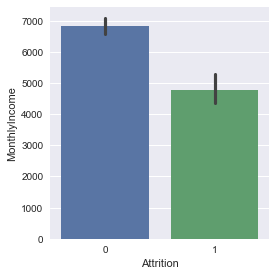

In [50]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')


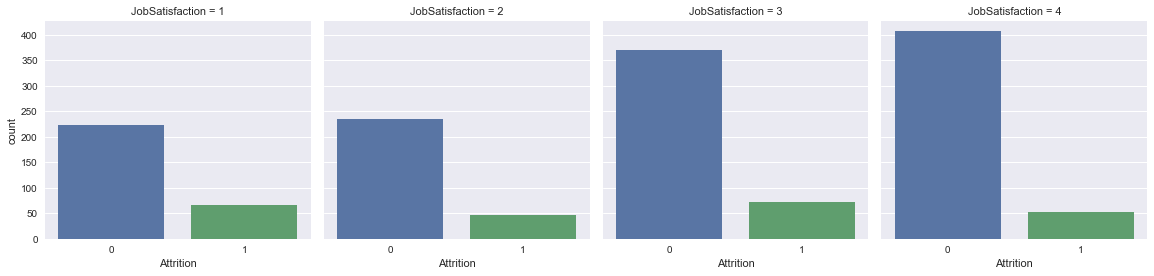

In [52]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')


In [54]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index') 


Attrition,0,1
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


In [55]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,0,1
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


In [56]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') # set normalize=index to view rowwise %.


Attrition,0,1
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


In [25]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [26]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [27]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['Y']
['No' 'Yes']


In [28]:
df.head() # just to verify.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [170]:
#Import the required packages

#Import pandas to read csv import pandas

#Import numpy for array related operations import numpy

#Import sklearn's feature selection algorithm from sklearn.feature_selection import RFE

#Import LogisticRegression for performing chi square test from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#Create array from data values

array = df.values

#Split the data into input and target

X = array[:,0:34]

Y = array[:,1]

#Feature extraction

model = LogisticRegression() 
rfe = RFE(model, 23)
fit = rfe.fit(X, Y)

print("Num Features: %d"% fit.n_features_) 

print("Selected Features: %s"% fit.support_) 

print("Feature Ranking: %s"% fit.ranking_)

Num Features: 23
Selected Features: [False  True  True False  True False False  True False False  True  True
 False  True  True False  True  True False False  True False  True  True
  True  True  True  True  True  True  True  True  True  True]
Feature Ranking: [ 4  1  1  8  1  2  5  1  7 10  1  1  6  1  1  3  1  1  9 11  1 12  1  1
  1  1  1  1  1  1  1  1  1  1]


In [171]:
#df.drop(['BusinessTravel','DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','MonthlyRate'
#          ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

In [29]:
df.head() # just to verify.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition'].as_matrix()

In [40]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.34,random_state=42)

In [41]:
oversampler=SMOTE(random_state=42)
x_train_smote,  y_train_smote = oversampler.fit_sample(x_train,y_train)

In [42]:
def compare(model):
    clf=model
    clf.fit(x_train_smote,y_train_smote)
    pred=clf.predict(x_test)
    
    # Calculating various metrics
    
    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    auroc.append(roc_auc_score(pred,y_test))  

In [43]:
acc=[]
prec=[]
rec=[]
auroc=[]
from sklearn import svm
from sklearn.cluster import KMeans
models=[SVC(kernel='rbf'),RandomForestClassifier(),LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KMeans(n_clusters=2, random_state=1),KNeighborsClassifier(5, weights='distance')]
model_names=['rbfSVM','RandomForestClassifier','LogisticRegression','GaussianNB','DecisionTreeClassifier','KMeans','KNN']

for model in range(len(models)):
    compare(models[model])
    
d={'Modelling Algo':model_names,'Accuracy':acc,'Precision':prec,'Recall':rec,'Area Under ROC Curve':auroc}
met_df=pd.DataFrame(d)
met_df

,Modelling Algo,Accuracy,Precision,Recall,Area Under ROC Curve
0,rbfSVM,0.846,0.380282,0.450000,0.675000
1,RandomForestClassifier,0.872,0.183099,0.684211,0.781814
2,LogisticRegression,0.728,0.591549,0.281879,0.599629
3,GaussianNB,0.628,0.605634,0.213930,0.560142
4,DecisionTreeClassifier,0.782,0.422535,0.306122,0.602066
5,KMeans,0.460,0.760563,0.175896,0.543906
6,KNN,0.616,0.633803,0.213270,0.561652


In [35]:
def comp_models(met_df,metric):
    sns.factorplot(data=met_df,x=metric,y='Modelling Algo',size=5,aspect=1.5,kind='bar')
    #sns.factorplot(data=met_df,y=metric,x='Modelling Algo',size=7,aspect=2,kind='point')

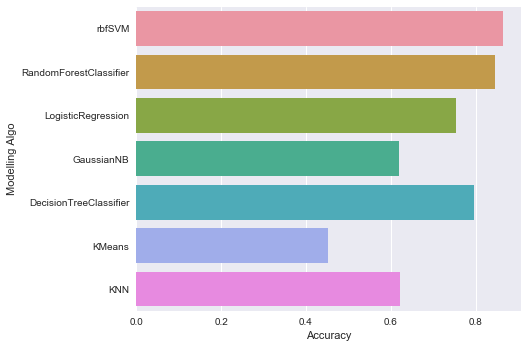

In [36]:
comp_models(met_df,'Accuracy')

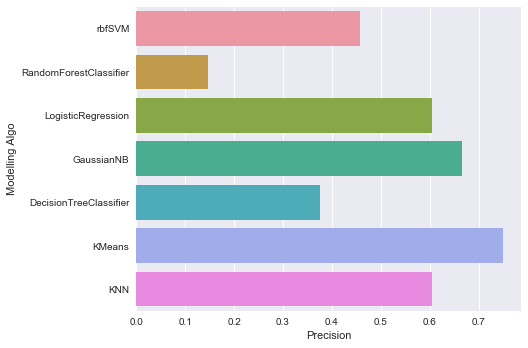

In [37]:
comp_models(met_df,'Precision')

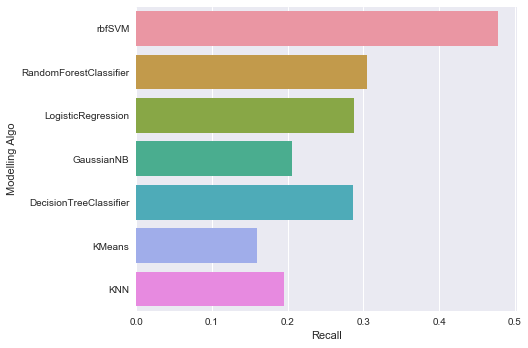

In [38]:
comp_models(met_df,'Recall')

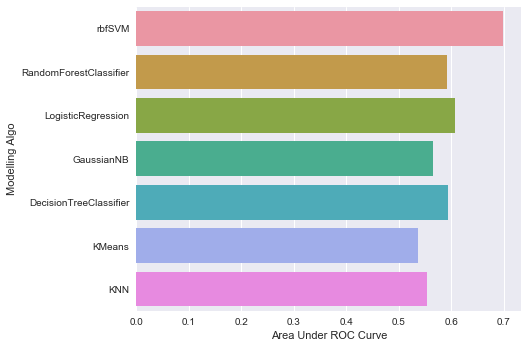

In [39]:
comp_models(met_df,'Area Under ROC Curve')